# Introduction to CNN and computer vision

## Get the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-05-25 13:15:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  33.3MB/s    in 3.1s    

2022-05-25 13:15:24 (33.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# walk through pizza_steak directory and list number of files
for dirparth, dirnames, filenames in os.walk("pizza_steak"):
  print("There are", len(dirnames), "directories and", len(filenames), "images in", dirparth)

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


## Visualize the data

In [6]:
# get the class names 

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # create a list of class_names from the subdirectories
print(class_names) 

['pizza' 'steak']


In [7]:
# visualize 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setup the target directory
  target_folder = target_dir + target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print("Image shape: ", img.shape)

  return img

['295491.jpg']
Image shape:  (382, 512, 3)


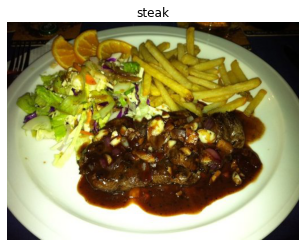

In [8]:
# view a random image from train

img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [9]:
img

array([[[23, 15, 12],
        [22, 14, 11],
        [19, 11,  8],
        ...,
        [ 0,  3,  2],
        [ 0,  2,  1],
        [ 0,  1,  0]],

       [[21, 13, 10],
        [19, 11,  8],
        [16,  8,  5],
        ...,
        [ 1,  3,  0],
        [ 0,  3,  0],
        [ 0,  3,  0]],

       [[18, 10,  7],
        [15,  7,  4],
        [13,  3,  1],
        ...,
        [ 2,  4,  1],
        [ 1,  3,  0],
        [ 0,  2,  0]],

       ...,

       [[14, 11, 20],
        [14, 11, 20],
        [15, 12, 21],
        ...,
        [ 7,  5,  8],
        [ 7,  5,  8],
        [ 7,  5,  8]],

       [[14, 11, 20],
        [14, 11, 20],
        [14, 11, 20],
        ...,
        [ 7,  5,  8],
        [ 7,  5,  8],
        [ 7,  5,  8]],

       [[13, 10, 19],
        [13, 10, 19],
        [14, 11, 20],
        ...,
        [ 7,  5,  8],
        [ 7,  5,  8],
        [ 7,  5,  8]]], dtype=uint8)

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(382, 512, 3), dtype=uint8, numpy=
array([[[23, 15, 12],
        [22, 14, 11],
        [19, 11,  8],
        ...,
        [ 0,  3,  2],
        [ 0,  2,  1],
        [ 0,  1,  0]],

       [[21, 13, 10],
        [19, 11,  8],
        [16,  8,  5],
        ...,
        [ 1,  3,  0],
        [ 0,  3,  0],
        [ 0,  3,  0]],

       [[18, 10,  7],
        [15,  7,  4],
        [13,  3,  1],
        ...,
        [ 2,  4,  1],
        [ 1,  3,  0],
        [ 0,  2,  0]],

       ...,

       [[14, 11, 20],
        [14, 11, 20],
        [15, 12, 21],
        ...,
        [ 7,  5,  8],
        [ 7,  5,  8],
        [ 7,  5,  8]],

       [[14, 11, 20],
        [14, 11, 20],
        [14, 11, 20],
        ...,
        [ 7,  5,  8],
        [ 7,  5,  8],
        [ 7,  5,  8]],

       [[13, 10, 19],
        [13, 10, 19],
        [14, 11, 20],
        ...,
        [ 7,  5,  8],
        [ 7,  5,  8],
        [ 7,  5,  8]]], dtype=uint8)>

In [11]:
# get all the pixel values between 0 and 1

img/225.

array([[[0.10222222, 0.06666667, 0.05333333],
        [0.09777778, 0.06222222, 0.04888889],
        [0.08444444, 0.04888889, 0.03555556],
        ...,
        [0.        , 0.01333333, 0.00888889],
        [0.        , 0.00888889, 0.00444444],
        [0.        , 0.00444444, 0.        ]],

       [[0.09333333, 0.05777778, 0.04444444],
        [0.08444444, 0.04888889, 0.03555556],
        [0.07111111, 0.03555556, 0.02222222],
        ...,
        [0.00444444, 0.01333333, 0.        ],
        [0.        , 0.01333333, 0.        ],
        [0.        , 0.01333333, 0.        ]],

       [[0.08      , 0.04444444, 0.03111111],
        [0.06666667, 0.03111111, 0.01777778],
        [0.05777778, 0.01333333, 0.00444444],
        ...,
        [0.00888889, 0.01777778, 0.00444444],
        [0.00444444, 0.01333333, 0.        ],
        [0.        , 0.00888889, 0.        ]],

       ...,

       [[0.06222222, 0.04888889, 0.08888889],
        [0.06222222, 0.04888889, 0.08888889],
        [0.06666667, 0

## End-to-end example

* Load our images
* Preprocess our images
* Build aa CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# seed
tf.random.set_seed(42)

# preprocess data (pixel values between 0 and 1, also called scalling / normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# path to data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir, batch_size = 32, target_size = (224,224), class_mode = "binary", seed = 42)
valid_data = valid_datagen.flow_from_directory(test_dir, batch_size = 32, target_size = (224,224), class_mode = "binary", seed = 42)

# same as the tiny VGG model

model_1 = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape = (224,224,3)),
                                     tf.keras.layers.Conv2D(10, 3, activation = "relu"),
                                     tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
                                     tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                     tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                     tf.keras.layers.MaxPool2D(2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile

model_1.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 266ms/step - loss: 0.5707 - accuracy: 0.6853 - val_loss: 0.3939 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 11s 240ms/step - loss: 0.4130 - accuracy: 0.8200 - val_loss: 0.3321 - val_accuracy: 0.8760
Epoch 3/5
47/47 [==============================] - 11s 239ms/step - loss: 0.3900 - accuracy: 0.8280 - val_loss: 0.3349 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 12s 260ms/step - loss: 0.3540 - accuracy: 0.8453 - val_loss: 0.2981 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 12s 247ms/step - loss: 0.2903 - accuracy: 0.8813 - val_loss: 0.2931 - val_accuracy: 0.8940


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before 

The one we built for dots data set

In [14]:
# seed
tf.random.set_seed(42)

# create 

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
                                                       
])

model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 214ms/step - loss: 1.7618 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


## Improving the above model

In [16]:
# seed
tf.random.set_seed(42)

# build
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit
history_3 =  model_3.fit(train_data,
                         epochs = 5,
                         steps_per_epoch = len(train_data),
                         validation_data = valid_data,
                         validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 219ms/step - loss: 3.0939 - accuracy: 0.6067 - val_loss: 1.1629 - val_accuracy: 0.6800
Epoch 2/5
47/47 [==============================] - 10s 212ms/step - loss: 1.2390 - accuracy: 0.7200 - val_loss: 0.5322 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 10s 212ms/step - loss: 0.7082 - accuracy: 0.7373 - val_loss: 0.8281 - val_accuracy: 0.6420
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.6649 - accuracy: 0.7400 - val_loss: 0.4822 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4976 - accuracy: 0.7787 - val_loss: 0.7810 - val_accuracy: 0.6880


In [17]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down

['1476404.jpg']
Image shape:  (512, 512, 3)
['1084888.jpg']
Image shape:  (384, 512, 3)


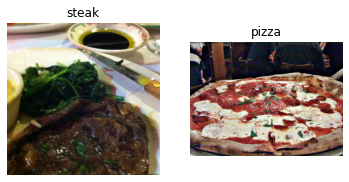

In [18]:
# Visualize data

plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [19]:
# Define directory dataset paths

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Next step to turn our data into batches.

A model might only look at 32 images at a time.

In [20]:
# create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [21]:
# Lord in our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory = train_dir, # target directory of the images
                                               target_size = (224, 224),  # Target size of images (height, width)
                                               class_mode = "binary", # type of data
                                               batch_size = 32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size  = (224, 224),
                                             class_mode = "binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [22]:
# get a sample of a train data bacth

images, labels = train_data.next() # get the next batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [23]:
# /how many batches are there

len(train_data)

47

In [24]:
1500/32

46.875

In [25]:
# get the first two images and the shape of the first image

images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [26]:
images[7]

array([[[0.30588236, 0.17254902, 0.227451  ],
        [0.34901962, 0.21960786, 0.25490198],
        [0.4039216 , 0.2784314 , 0.2901961 ],
        ...,
        [0.16470589, 0.02745098, 0.1137255 ],
        [0.16862746, 0.01960784, 0.10980393],
        [0.15686275, 0.00784314, 0.10588236]],

       [[0.28235295, 0.14901961, 0.20392159],
        [0.34117648, 0.21176472, 0.24705884],
        [0.42352945, 0.29803923, 0.30980393],
        ...,
        [0.17254902, 0.02352941, 0.1137255 ],
        [0.1764706 , 0.02745098, 0.11764707],
        [0.16078432, 0.01176471, 0.10980393]],

       [[0.2627451 , 0.13725491, 0.19607845],
        [0.3254902 , 0.20000002, 0.24313727],
        [0.41960788, 0.29803923, 0.31764707],
        ...,
        [0.19215688, 0.04313726, 0.1254902 ],
        [0.1764706 , 0.02745098, 0.11764707],
        [0.16862746, 0.03137255, 0.1254902 ]],

       ...,

       [[0.62352943, 0.5803922 , 0.5568628 ],
        [0.6039216 , 0.56078434, 0.5372549 ],
        [0.6039216 , 0

In [27]:
images[7].shape

(224, 224, 3)

In [28]:
# view the first batch of labels

labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (baseline)

In [29]:
# easy way 
from tensorflow.keras.optimizers import  Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [43]:
# create model (baseline - 3 layer convolutional neural network)

model_4 = Sequential([
                      Conv2D(filters=10,                 # filter is the number of sliding windows across an input (higher = more complex)  
                             kernel_size=3,              # size of the sliding window going across an input
                             strides=1,                  # size of the step the sliding window takes acorss an input
                             padding="valid",            # if "same" output shape is the same as input shape, if "valid", output shape gets compressed
                             activation="relu",
                             input_shape=(224, 224, 3)),  # input layer (specify input shape)
                      Conv2D(10, 3, activation="relu"),
                      Conv2D(10, 3, activation="relu"),
                      Flatten(),
                      Dense(1, activation="sigmoid")      # output layer (working with binary classification so only 1 output neuron)
])

In [44]:
# compile

model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [45]:
# get summary 
model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_20 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_21 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_8 (Flatten)         (None, 475240)            0         
                                                                 
 dense_13 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [46]:
# check the lengths of training and test data generators

len(train_data), len(test_data)

(47, 16)

In [47]:
# fit
history_4 = model_4.fit(train_data, # This is a combination of labels and sample data (Combination of X and y and tensorflow will figure it out)
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 272ms/step - loss: 1.5983 - accuracy: 0.6420 - val_loss: 0.5536 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 12s 246ms/step - loss: 0.5181 - accuracy: 0.7707 - val_loss: 0.4270 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 12s 249ms/step - loss: 0.4224 - accuracy: 0.8153 - val_loss: 0.4276 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 12s 248ms/step - loss: 0.3368 - accuracy: 0.8673 - val_loss: 0.3683 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 12s 248ms/step - loss: 0.2268 - accuracy: 0.9300 - val_loss: 0.3707 - val_accuracy: 0.8400


### 5. evaluation of our model

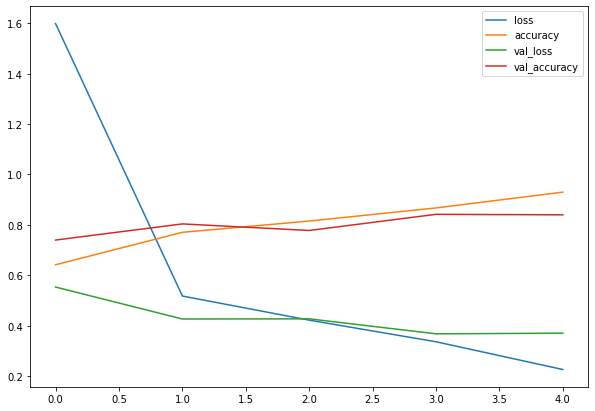

In [51]:
# plot training curves

import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10,7))

In [52]:
# Plot the validation and training curves separately

import matplotlib.pyplot as plt
def plot_loss_curves(history):
  """
  returns seperate loss curves for training and validaion metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs we run for

  # Plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

**Note:** When a model's **validation loss starts to increase**, it's likey that the model is **overfitting** the training dataset. This mean, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished


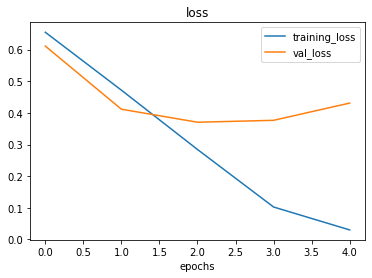

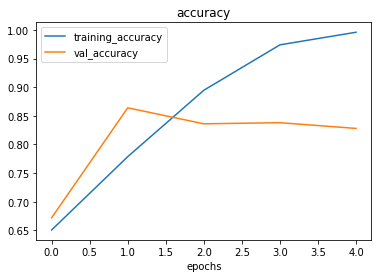

In [53]:
# Check out the loss and accuracy of model_4

plot_loss_curves(histroy_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to imporve

* Increase conv layers
* Increase Conv filters
* Add another Dense layer to the output of the flattened layer

Reduce

* Data augmentation
* regularization layers (such as MaxPool2D)
* Add more data...


**Note:** Reducing overfitting is also known as *regularization*

In [54]:
# Create the model (this is going to be the new baseline model)

#import tensorflow as tf
#tf.random.set_seed(42)

# create

model_5 = Sequential([
                      Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
                      MaxPool2D(pool_size = 2),
                      Conv2D(10, 3, activation = "relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation = "relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation = "sigmoid")
])

In [55]:
# Compile
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [56]:
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 229ms/step - loss: 0.6130 - accuracy: 0.6693 - val_loss: 0.4517 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 11s 224ms/step - loss: 0.4521 - accuracy: 0.7820 - val_loss: 0.4240 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4235 - accuracy: 0.8167 - val_loss: 0.3405 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 11s 226ms/step - loss: 0.3862 - accuracy: 0.8300 - val_loss: 0.3275 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 11s 225ms/step - loss: 0.3835 - accuracy: 0.8280 - val_loss: 0.3132 - val_accuracy: 0.8820


In [57]:
# Get a summary of the model with max pooling 
model_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_24 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [58]:
model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_20 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_21 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_8 (Flatten)         (None, 475240)            0         
                                                                 
 dense_13 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


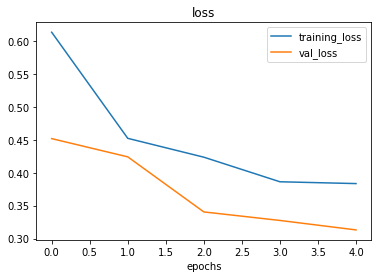

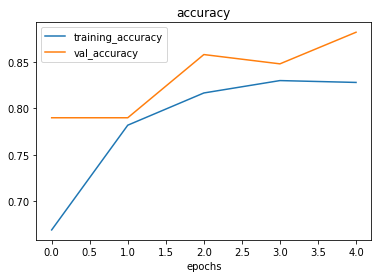

In [59]:
plot_loss_curves(history_5)

### Data augmentation

In [60]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.3,
                                             horizontal_flip = True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [61]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = "binary",
                                                                   shuffle = False) # for demo only

# Create non-augmented train data batches
print("Non-Augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)

# Create non-augmented test data batches
print("Non-Augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented test data
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model



In [62]:
# Get sample data batches

images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: only data are augmented, the lables are not

Showing image number:  11


(-0.5, 223.5, 223.5, -0.5)

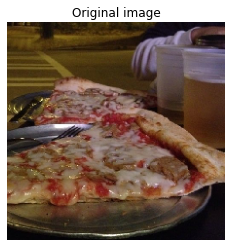

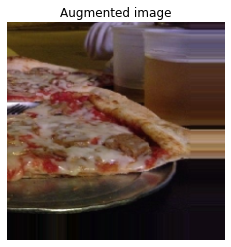

In [63]:
# show original image and augmented image
import random
random_number = random.randint(0 , 32) # our batch sizes are 32
print("Showing image number: ", random_number)
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)

In [64]:
# Create a model (Same as model_5)

model_6 = Sequential([
                      Conv2D(10, 3, activation = "relu"),
                      MaxPool2D(pool_size = 2),
                      Conv2D(10, 3, activation = "relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation = "relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation = "sigmoid")
])

# Compile
model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# fit
history_6 = model_6.fit(train_data_augmented,
                         epochs = 5,
                         steps_per_epoch = len(train_data_augmented),
                         validation_data = test_data,
                         validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 561ms/step - loss: 0.7551 - accuracy: 0.5327 - val_loss: 0.6811 - val_accuracy: 0.5600
Epoch 2/5
47/47 [==============================] - 26s 556ms/step - loss: 0.7127 - accuracy: 0.4807 - val_loss: 0.6796 - val_accuracy: 0.5020
Epoch 3/5
47/47 [==============================] - 26s 552ms/step - loss: 0.6979 - accuracy: 0.4580 - val_loss: 0.6815 - val_accuracy: 0.6920
Epoch 4/5
47/47 [==============================] - 26s 553ms/step - loss: 0.6852 - accuracy: 0.5380 - val_loss: 0.6718 - val_accuracy: 0.5740
Epoch 5/5
47/47 [==============================] - 26s 555ms/step - loss: 0.6892 - accuracy: 0.5560 - val_loss: 0.6701 - val_accuracy: 0.7400


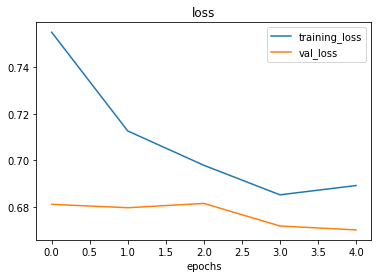

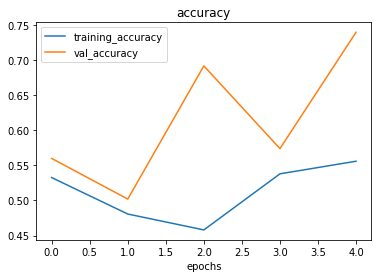

In [65]:
plot_loss_curves(history_6)